In [1]:
%matplotlib notebook
%pylab
import matplotlib.pyplot as plt
from matplotlib import rc
import speclite
import speclite.filters
import astropy.table as at
rc('text', usetex=True)
rc('axes', unicode_minus=True)
rc('font',**{'family':'serif','serif':['Times New Roman']})
colors = 'C4,C2,C3,C1,C5,k'
colors = colors.split(',')

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
lsst = speclite.filters.load_filters('lsst2016-*')
atmos = at.Table.read('atmos_12_lowater_aerosol.dat', format='ascii', names=['wave','atm'])
atmos['wave']*=10.

<IPython.core.display.Javascript object>


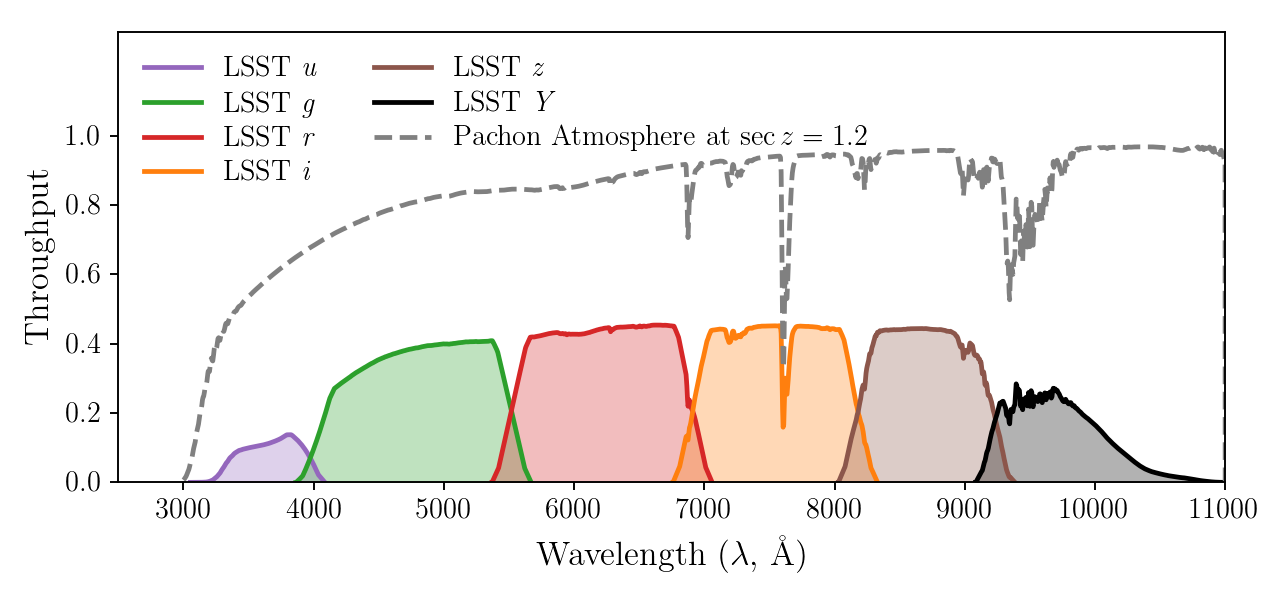

In [11]:
fig = plt.figure(figsize=(7.5, 3.5))
ax = fig.add_subplot(111)
for i, name in enumerate(lsst.names):
    filt = lsst[i]
    wave = filt._wavelength
    resp = filt._response
    short_band = name.split('-')[1]
    if short_band == 'y':
        short_band = short_band.upper()
    label = r'LSST \textit {}'.format(short_band)
    ax.plot(wave, resp, color=colors[i], lw=2, marker='None', ls='-', label=label)
    ax.fill_between(wave, resp, 0, color=colors[i], alpha=0.3)
ax.plot(atmos['wave'], atmos['atm'], color='grey', ls='--', lw=2, label=r'Pachon Atmosphere at $\sec z = 1.2$')
ax.set_xlim(2500, 11000)
ax.set_ylim(0, 1.3)
yticks = np.arange(0, 1.1, 0.2)
ax.set_yticks(yticks)
ax.set_ylabel('Throughput', fontsize='x-large')
ax.set_xlabel(r'Wavelength ($\lambda$, \AA)', fontsize='x-large')
ax.legend(loc='upper left', fontsize='large', labelspacing=0.3, frameon=False, ncol=2)
#large tick labels
ax.tick_params(axis='both', which='major', labelsize='large')
fig.tight_layout(rect=[0,0,1,1])

In [12]:
fig.savefig('LSST_bands.pdf')